### GROUP 54 
 Yun Tian 26192237; Shenrui Li 70138052; Junhao Liang 92188416; Jianyi Chen 60079217


### INTRODUCTION


ATP (Association of Tennis Professionals) is the governing body for professional men's tennis. ATP tennis refers to the tournaments and matches organized and sanctioned by the ATP. It represents the highest level of competition for male tennis players globally.

Our project will tell if a professional tennis player will win or lose the match. The dataset contains between 2017 and 2019 for the top 500 players. Name, level, date, and number of people in the draw, as well as the match number, points, and time, are all in the information. It also has the ID, seed, name, age, height, hand used, country, rank, rank points, and saved in the match for both the winner and the loss. When a person is in the game, their age is figured out and given in decimals. The player's rank is based on their ATPrank as of the start of the tournament. After we choose our models, we will get rid of any rows that are missing data, such as containing NA.


### Method

Abstract
In all the data, we will use the age, ranking, and points of winners and losers as predictor variables. First, the "tidymodels" R package will 
be used to build a binary K-nearest neighbor classification model to analyze the data for these variables. Second, the meaning of "win" and "lose"
will be defined and combined, and the relationship between winning and losing will be defined as age. In the following steps, the seeds 
will be set and randomly split, and sort the dataset to create a training and test set, which is the core of our data analysis. After that, 
group_by and summarize will be used to visually compare loss and win in three different ways using histograms.

1. Setting the Seed: The set.seed(256) function is used to set a random seed, ensuring reproducibility of random processes.

2. Creating Separate Datasets: The dataset is split into two separate datasets: atp_lose and atp_win. These datasets include information about matches that 
were lost (atp_lose) and matches that were won (atp_win). The columns include the result, age of the player, and their rank points.

3. Combining Datasets: The combined_data dataset is created by combining the atp_lose and atp_win datasets using the rbind() function. This results in a 
dataset that includes both winning and losing match information.

4. Data Splitting: The combined_data is split into training and testing sets using the initial_split() function from the rsample package. The split is done 
with a 80:20 ratio, where 80% of the data is assigned to the training set (result_train) and 20% is assigned to the testing set (result_test).


5. Calculating Mean Predictors: The mean age (predictor_mean3) and mean rank points (predictor_mean1) are calculated for each result category (win or lose) 
within the training dataset. This provides insights into the average age and rank points of players in winning and losing matches.

6. Creating Plots: Three plots are created to visualize the data:
train_plot_1 is a bar plot that displays the average rank points (points) for each result category (win or lose) within the training dataset.
train_plot_2 is a histogram that shows the distribution of rank points (points) in the combined dataset.
train_plot_3 is a scatter plot that represents the relationship between age and rank points (points) in the combined dataset, with different colors 
indicating the result category (win or lose).

### Loads data

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
atp_data <- read_csv("https://raw.githubusercontent.com/JianyiC/group54_work/main/atp2017-2019.csv") |>
  select(winner_age, loser_age, winner_rank_points, loser_rank_points) |> 
  na.omit()
atp_data

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


winner_age,loser_age,winner_rank_points,loser_rank_points
<dbl>,<dbl>,<dbl>,<dbl>
29.00479,22.88569,3590,1977
22.88569,33.70568,1977,200
29.00479,31.88227,3590,1050
⋮,⋮,⋮,⋮
32.59411,33.68925,2320,667
26.95414,32.59411,3775,2320
23.73990,33.68925,2235,667


winner_age: The age of the player who emerged as the winner in a tennis match.

loser_age: The age of the player who ended up losing the tennis match. 

winner_rank_points: The rank points accumulated by the winning player.

loser_rank_points: The rank points accumulated by the losing player.



### Cleaning and Wrangling

In [3]:
set.seed(256)
#lose
lose <- rep(c("lose"), times = nrow(atp_data))
atp_lose <- cbind(atp_data, lose) |>
  select(lose, loser_age, loser_rank_points)

colnames(atp_lose) <- c("result", "age", "points")


#win
win <- rep(c("win"), times = nrow(atp_data))
atp_win <- cbind(atp_data, win) |>
  select(win, winner_age, winner_rank_points)
colnames(atp_win) <- c("result", "age","points")

#to one form
combined_data <- rbind(atp_win, atp_lose)
combined_data 


result,age,points
<chr>,<dbl>,<dbl>
win,29.00479,3590
win,22.88569,1977
win,29.00479,3590
⋮,⋮,⋮
lose,33.68925,667
lose,32.59411,2320
lose,33.68925,667


result: The outcome or result of a tennis match. It indicates whether a player or team won or lost the match.

age: The age of the player or players involved in the tennis match. 

points: The points or score accumulated by the player or team during the match. 


In [4]:
data_split <- initial_split(combined_data, prop = 0.8, strata = result)  
result_train <- training(data_split)   
result_test <- testing(data_split)

result_train
result_test

,result,age,points
,<chr>,<dbl>,<dbl>
6855,lose,22.88569,1977
6856,lose,33.70568,200
6857,lose,31.88227,1050
⋮,⋮,⋮,⋮
6852,win,32.59411,2320
6853,win,26.95414,3775
6854,win,23.73990,2235


,result,age,points
,<chr>,<dbl>,<dbl>
3,win,29.00479,3590
4,win,33.70568,200
5,win,22.88569,1977
⋮,⋮,⋮,⋮
13692,lose,31.40862,10465
13703,lose,36.26557,9005
13707,lose,32.59411,2320


### Summarize the data

In [5]:
predictor_mean1 <- result_train |>
                  group_by(result) |>
                  summarize(points = mean(points))
predictor_mean1


predictor_mean3 <- result_train |>
                  group_by(result) |>
                  summarize(age = mean(age))
predictor_mean3

result,points
<chr>,<dbl>
lose,1151.958
win,1790.338


result,age
<chr>,<dbl>
lose,27.50645
win,27.66466


### Visualization

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 545 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


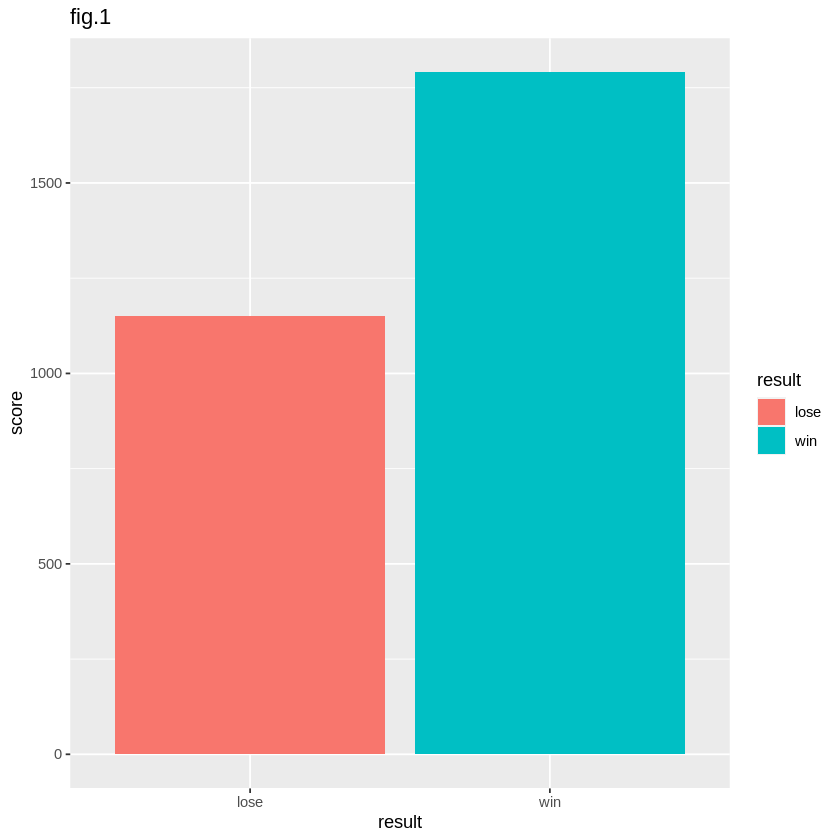

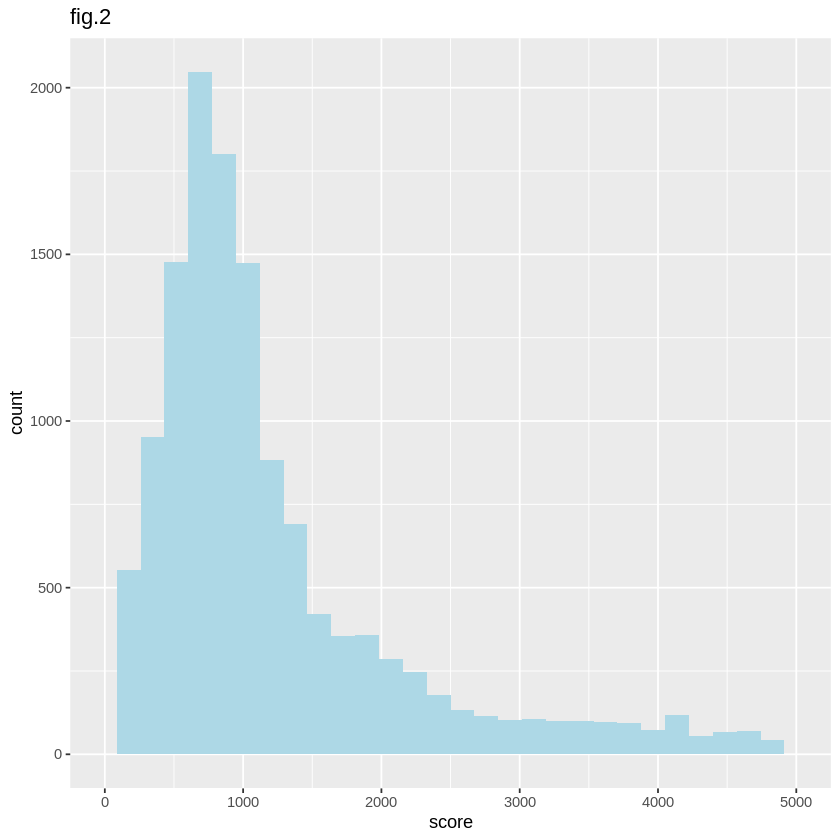

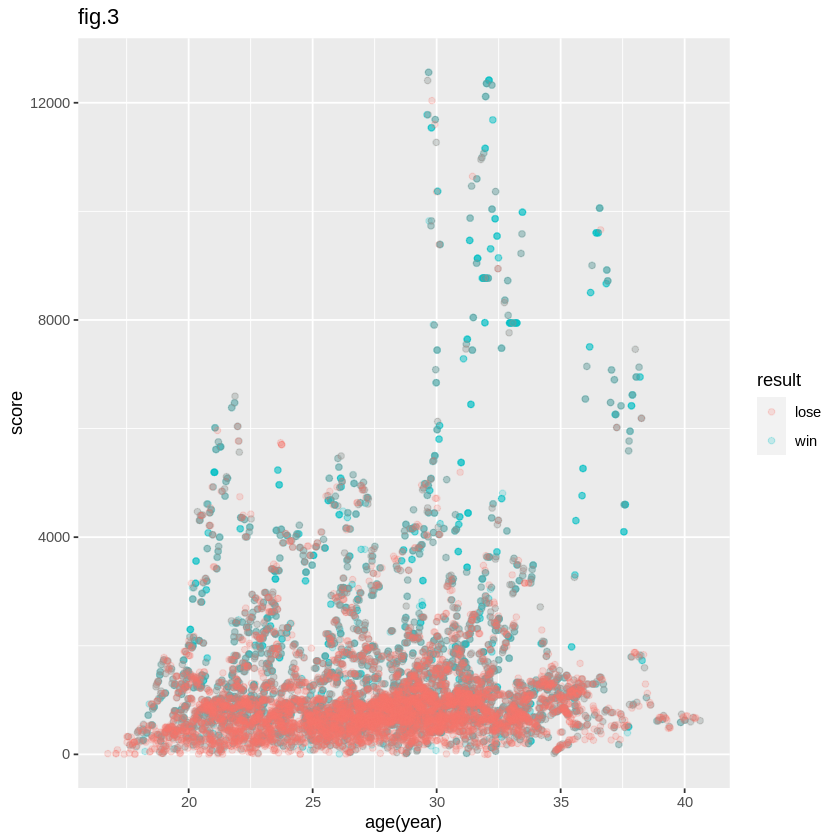

In [6]:
train_plot_1 <- ggplot(predictor_mean1, aes(x = result, y = points, fill = result)) +
                geom_bar(stat = "identity") +
                labs(x = "result", y = "score") +
                ggtitle("fig.1")
train_plot_1


train_plot_2 <- ggplot(combined_data , aes(x = points)) +
                      geom_histogram(fill = "lightblue") +
                labs(x = "score") +
                scale_x_continuous(limits=c(0, 5000)) +
                ggtitle("fig.2")
train_plot_2

train_plot_3 <- ggplot(combined_data , aes(x = age, y = points, color = result)) +
                      geom_point(alpha = 0.2) +
                labs(x = "age(year)", y = "score") +
                ggtitle("fig.3")
train_plot_3

### Expected outcomes and significance

1. Expected Results: 
By looking at past tennis match data and making predictive models, we hope to find patterns and relationships that can help us predict the result of tennis matches with a certain level of accuracy. Based on age, rank points, and possibly other variables in the dataset, these predictions can help you figure out which person or team is more likely to win a given match.

2. Effects of Findings: Player Performance Analysis: 1. Looking at past data can help figure out what makes a player do well or poorly in a match. This knowledge can be helpful for players, coaches, and trainers because it tells them where they need to improve and how to change their training plans. 2. Strategy Development: Looking at past data and making predictions about how matches will go can help players and coaches come up with good strategies to use against certain opponents. Knowing the strengths and flaws of your opponent can help you prepare for and make decisions during a match.

3. Future Questions: Match-Specific Factors: In addition to player-specific factors, it could be helpful to think about match-specific factors like the weather, the state of the court, and how tired the players are. By looking at how these factors interact with individual traits, we could better predict what will happen.
